<a href="https://colab.research.google.com/github/srujan-b/computervision/blob/main/bitwise-operator/bitwiseOperators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Let's explore how bitwise operators like AND, NOT, and OR can be applied in computer vision by using the example of placing a Christmas hat on Elon Musk. Here are the steps to understand these bitwise operations:

In [1]:
!git clone https://github.com/srujan-b/computervision.git

Cloning into 'computervision'...
remote: Enumerating objects: 41, done.
remote: Counting objects: 100% (41/41), done.
remote: Compressing objects: 100% (35/35), done.
remote: Total 41 (delta 8), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (41/41), 996.49 KiB | 7.44 MiB/s, done.
Resolving deltas: 100% (8/8), done.


Trump Image source : https://i.guim.co.uk/img/media/5ed54edd5d9d620487c523150e4672e3df43e442/0_197_3000_1800/master/3000.jpg?width=620&dpr=1&s=none

Trump MAGA iage source: https://www.trumpstore.com/wp-content/uploads/2021/10/TORG102-Front.jpg

In [2]:
# Importing necessary libraries
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Import the Matplotlib library for plotting
import matplotlib

# Set the default figure size for Matplotlib plots to 6.0 inches by 6.0 inches
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)

# Set the default colormap for images to grayscale
matplotlib.rcParams['image.cmap'] = 'gray'


##Loading the images

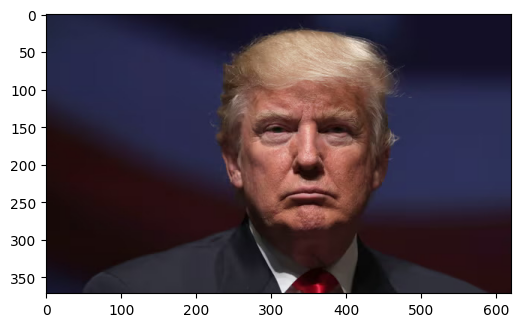

In [13]:
trumpImagePath = "/content/computervision/bitwise-operator/trump.jpg"
trumpImage = cv2.imread(trumpImagePath)
plt.imshow(trumpImage[...,::-1])

# Make a copy
trumpImageWithCapBitwise = trumpImage.copy()

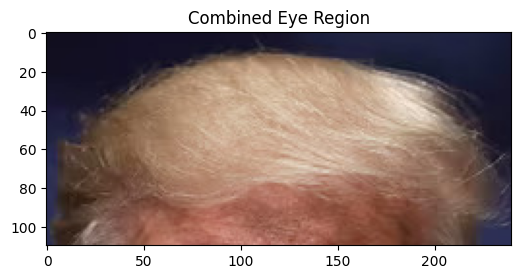

In [17]:
capROI= trumpImageWithCapBitwise[10:120,230:470]
plt.imshow(np.uint8(capROI)[:,:,::-1]);plt.title("Combined Eye Region");

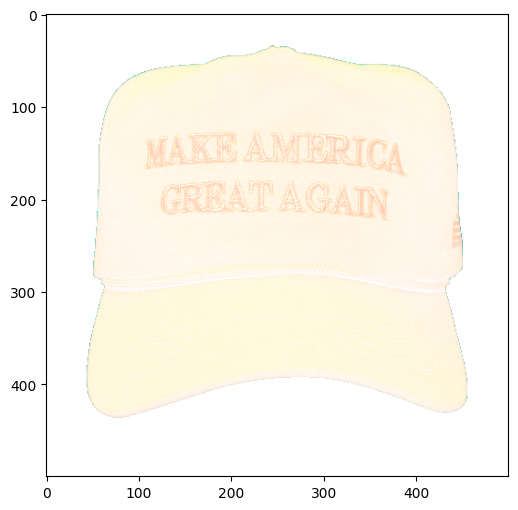

In [10]:
trumpMAGACapPath = "/content/computervision/bitwise-operator/trumpMAGA.png"
magaPNG = cv2.imread(trumpMAGACapPath,-1)
plt.imshow(magaPNG[...,::-1])